# **Import libraries**

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

In [ ]:
import pickle
import numpy as np
from PIL import Image
import cv2
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras


import sys
import os
from math import log
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class_indices = (
    ('Adialer.C', 0),
    ('Agent.FYI', 1),
    ('Alueron.gen!J', 2),
    ('Autorun.K', 3),
    ('C2LOP.P', 4),
    ('C2LOP.gen!g', 5),
    ('Dialplatform.B', 6),
    ('Dontovo.A', 7),
    ('Fakerean', 8),
    ('Instantaccess', 9),
    ('Lolyda.AA1', 10),
    ('Lolyda.AA2', 11),
    ('Lolyda.AA3', 12),
    ('Lolyda.AT', 13),
    ('Malex.gen!J', 14),
    ('Obfuscator.AD', 15),
    ('Rbot!gen', 16),
    ('Skintrim.N', 17),
    ('Swizzor.gen!E', 18),
    ('Swizzor.gen!I', 19),
    ('VB.AT', 20),
    ('Wintrim.BX', 21),
    ('Allaple.A', 22),
    ('Allaple.L', 23),
    ('Yuner.A', 24)
)


In [ ]:
# Chuyển đổi tuple thành dictionary
class_indices = dict(class_indices)

# Lấy các keys của dictionary
classes = class_indices.keys()

# In ra kết quả
print(classes)

dict_keys(['Adialer.C', 'Agent.FYI', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Allaple.A', 'Allaple.L', 'Yuner.A'])


In [ ]:
#ok
with open('/content/drive/MyDrive/Dữ liệu/data_thưc tập/modified_combined_data.pkl', 'rb') as f:
    imgs, labels = pickle.load(f)

In [ ]:
imgs.shape

(17499, 32, 32, 3)

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

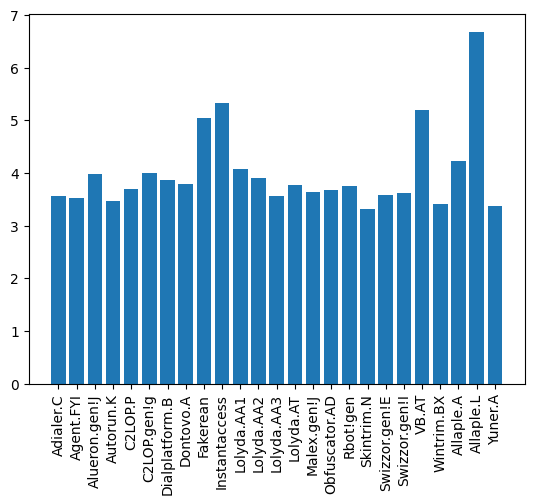

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [ ]:
X_train.shape

(12249, 32, 32, 3)

In [ ]:
X_train[0]

array([[[0.19607843, 0.19607843, 0.19607843],
        [0.8666667 , 0.8666667 , 0.8666667 ],
        [0.17254902, 0.17254902, 0.17254902],
        ...,
        [0.89411765, 0.89411765, 0.89411765],
        [0.        , 0.        , 0.        ],
        [0.07843138, 0.07843138, 0.07843138]],

       [[0.09411765, 0.09411765, 0.09411765],
        [0.10980392, 0.10980392, 0.10980392],
        [0.5803922 , 0.5803922 , 0.5803922 ],
        ...,
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.49803922, 0.49803922, 0.49803922]],

       [[0.3254902 , 0.3254902 , 0.3254902 ],
        [0.78039217, 0.78039217, 0.78039217],
        [0.78039217, 0.78039217, 0.78039217],
        ...,
        [0.25490198, 0.25490198, 0.25490198],
        [0.75686276, 0.75686276, 0.75686276],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.9490196 , 0.9490196 , 0.9490196 ],
        [0.5568628 , 0.5568628 , 0.5568628 ],
        [0.5254902 , 0

In [ ]:
y_train.shape

(12249, 25)

In [ ]:
X_test

array([[[[0.05882353, 0.05882353, 0.05882353],
         [0.04705882, 0.04705882, 0.04705882],
         [0.19215687, 0.19215687, 0.19215687],
         ...,
         [0.8627451 , 0.8627451 , 0.8627451 ],
         [0.10196079, 0.10196079, 0.10196079],
         [0.84313726, 0.84313726, 0.84313726]],

        [[0.72156864, 0.72156864, 0.72156864],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.09019608, 0.09019608, 0.09019608],
         ...,
         [0.45882353, 0.45882353, 0.45882353],
         [0.29411766, 0.29411766, 0.29411766],
         [0.5686275 , 0.5686275 , 0.5686275 ]],

        [[0.3647059 , 0.3647059 , 0.3647059 ],
         [0.6156863 , 0.6156863 , 0.6156863 ],
         [0.41568628, 0.41568628, 0.41568628],
         ...,
         [0.03921569, 0.03921569, 0.03921569],
         [0.35686275, 0.35686275, 0.35686275],
         [0.84313726, 0.84313726, 0.84313726]],

        ...,

        [[0.10980392, 0.10980392, 0.10980392],
         [0.7921569 , 0.7921569 , 0.7921569 ]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Input

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
num_classes = 25

In [ ]:
# relu
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(32,32,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
'''
#tanh
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='tanh',
                     input_shape=(32,32,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='tanh'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='tanh'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='tanh'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model
'''

In [ ]:
'''
# sigmoid
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='sigmoid',
                     input_shape=(32,32,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='sigmoid'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='sigmoid'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='sigmoid'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model
'''

In [ ]:
'''
# leaky ReLu
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     input_shape=(32,32,3)))
    Malware_model.add(LeakyReLU(alpha=0.3))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3)))
    Malware_model.add(LeakyReLU(alpha=0.3))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128))
    Malware_model.add(LeakyReLU(alpha=0.3))

    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50))
    Malware_model.add(LeakyReLU(alpha=0.3))

    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

'''

In [ ]:
'''
# kết hợp

def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='sigmoid',
                     input_shape=(32,32,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='tanh'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50))
    Malware_model.add(LeakyReLU(alpha=0.3))

    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model
'''

In [ ]:
'''
# kết hợp + thêm layers
def malware_model():
    Malware_model = Sequential()

    # Thêm các lớp tích chập
    Malware_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    # Thêm lớp Flatten để chuyển đổi từ dữ liệu 2D sang 1D
    Malware_model.add(Flatten())

    # Thêm các lớp Dense với nhiều nơ-ron hơn
    Malware_model.add(Dense(512, activation='relu'))
    Malware_model.add(Dropout(0.5))

    Malware_model.add(Dense(256, activation='relu'))
    Malware_model.add(Dropout(0.5))

    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))

    # Lớp cuối cùng với số lượng nơ-ron bằng số lớp cần phân loại
    Malware_model.add(Dense(num_classes, activation='softmax'))

    # Compile mô hình
    Malware_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return Malware_model
'''

In [ ]:
Malware_model = malware_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Malware_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          69,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,878 (319.84 KB)

 Trainable params: 81,878 (319.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

y_train_new = np.argmax(y_train, axis=1)

In [ ]:
np.unique(y_train_new)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes =  np.unique(y_train_new),
                                     y = y_train_new)

In [ ]:
class_weights = dict(zip(np.unique(y_train_new), class_weights))
class_weights

{0: 1.0961073825503356,
 1: 1.144766355140187,
 2: 0.956953125,
 3: 1.1777884615384615,
 4: 1.1010337078651686,
 5: 1.0358562367864694,
 6: 1.0536774193548386,
 7: 1.0697816593886462,
 8: 0.8098512396694215,
 9: 0.7549460708782743,
 10: 0.9625933202357564,
 11: 1.0514163090128756,
 12: 1.1474473067915691,
 13: 1.0863858093126386,
 14: 1.0744736842105262,
 15: 1.1110204081632653,
 16: 1.0271698113207548,
 17: 1.2157816377171216,
 18: 1.0985650224215247,
 19: 1.0863858093126386,
 20: 0.7572797527047913,
 21: 1.1721531100478468,
 22: 0.9495348837209302,
 23: 0.5938909090909091,
 24: 1.1721531100478468}

In [ ]:
# relu
history = Malware_model.fit(X_train, y_train, batch_size=30, validation_data=(X_test, y_test), epochs=40,  class_weight=class_weights)

Epoch 1/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.3029 - loss: 2.3660 - val_accuracy: 0.8383 - val_loss: 0.5330
Epoch 2/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.7918 - loss: 0.5827 - val_accuracy: 0.8667 - val_loss: 0.3686
Epoch 3/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.8406 - loss: 0.4474 - val_accuracy: 0.8909 - val_loss: 0.3102
Epoch 4/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8628 - loss: 0.3865 - val_accuracy: 0.9112 - val_loss: 0.2757
Epoch 5/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8718 - loss: 0.3473 - val_accuracy: 0.9189 - val_loss: 0.2569
Epoch 6/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8879 - loss: 0.3257 - val_accuracy: 0.9219 - val_loss: 0.2515
Epoch 7/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8933 - loss: 0.2936 - val_accuracy: 0.9208 - val_loss: 0.2456
Epoch 8/40
409/409 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9039 - loss: 0.2598 - 

In [ ]:
import matplotlib.pyplot as plt

# Lấy lịch sử của độ accuracy và độ loss trên tập huấn luyện và tập kiểm tra
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

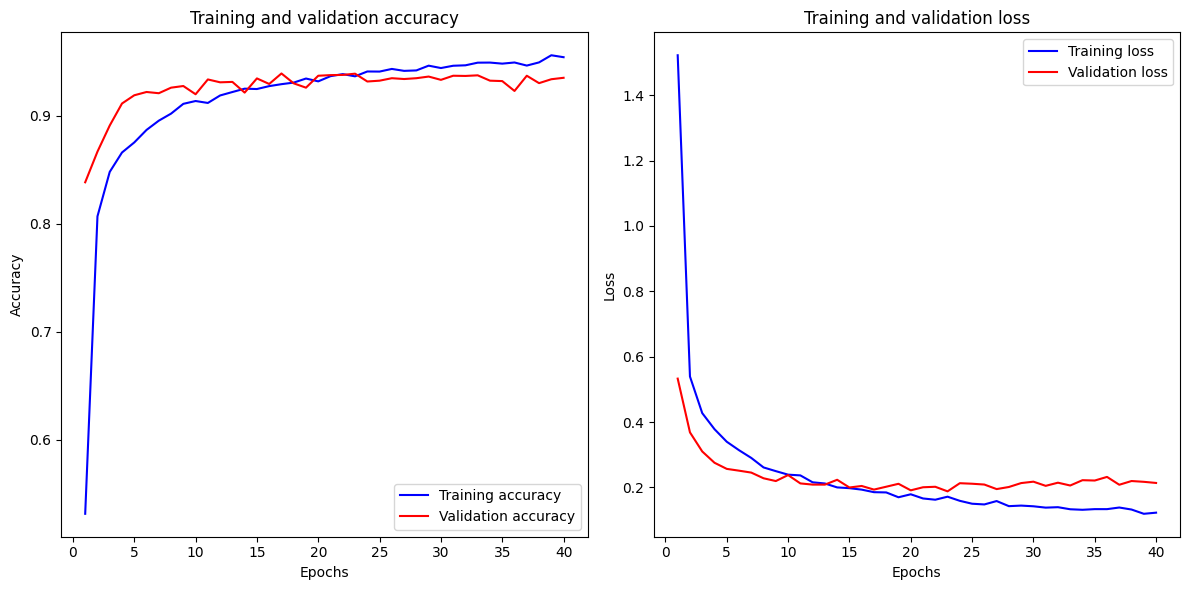

In [ ]:
# Vẽ đồ thị
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 6))

# Độ accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Độ loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
'''
# Lưu mô hình vào một tệp tin
Malware_model.save("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")
'''

In [ ]:
Malware_model.save("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode_1).h5")


In [ ]:
scores = Malware_model.evaluate(X_test, y_test)

165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9339 - loss: 0.2088


In [ ]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9350476264953613


In [ ]:
import numpy as np
import pandas as pd

y_pred = Malware_model.predict(X_test, verbose=0)

y_pred

array([[1.0905816e-06, 6.4677799e-08, 4.6049074e-08, ..., 6.5797596e-04,
        1.7380450e-03, 7.0141129e-11],
       [7.9139412e-12, 5.7404770e-13, 1.4696080e-20, ..., 2.7236493e-14,
        2.6219243e-16, 6.0116086e-17],
       [3.9594361e-24, 7.2177047e-20, 1.2542946e-16, ..., 2.4617272e-12,
        4.9205737e-16, 6.0537309e-14],
       ...,
       [6.0939066e-21, 3.0353063e-16, 5.8648087e-15, ..., 1.7072821e-10,
        1.1750158e-10, 4.1200719e-14],
       [3.7634524e-22, 1.2944200e-18, 1.7078014e-13, ..., 9.3495198e-11,
        4.9445108e-15, 2.2794424e-11],
       [1.4046077e-05, 8.5782801e-08, 2.5650575e-06, ..., 4.9087432e-01,
        4.9410943e-02, 6.3580812e-09]], dtype=float32)

In [ ]:
y_pred[0]

array([3.5160811e-30, 1.2540256e-18, 1.5974802e-43, 2.5347775e-25,
       1.0918237e-36, 1.4840187e-35, 3.8817131e-39, 1.0000000e+00,
       1.1210388e-44, 1.1098284e-42, 1.5445535e-29, 1.3794194e-23,
       9.4481005e-33, 0.0000000e+00, 0.0000000e+00, 4.2038954e-45,
       1.5760993e-21, 1.5681403e-37, 4.3041602e-25, 6.2689309e-22,
       1.3467793e-19, 0.0000000e+00, 0.0000000e+00, 6.7262326e-44,
       5.5515058e-23], dtype=float32)

In [ ]:
thu = np.argmax(y_pred[0])
thu

7

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
y_test2 = np.argmax(y_test, axis=1)

In [ ]:
y_test2


array([21, 16,  8, ...,  5,  8, 22])

In [ ]:
from sklearn import metrics

# Chuyển dự đoán từ dạng xác suất sang nhãn lớp
y_pred = np.argmax(y_pred, axis=1)

c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
y_pred

array([21, 16,  8, ...,  4,  8, 22])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9346666666666666


In [ ]:
from sklearn.metrics import classification_report

# Tạo báo cáo
report = classification_report(y_test2, y_pred)

# In báo cáo
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       212
           3       1.00      0.81      0.90       171
           4       0.85      0.83      0.84       217
           5       0.84      0.80      0.82       217
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       197
           8       0.98      1.00      0.99       246
           9       1.00      1.00      1.00       279
          10       1.00      0.98      0.99       197
          11       1.00      1.00      1.00       216
          12       1.00      0.99      1.00       180
          13       0.99      0.98      0.99       191
          14       0.96      0.84      0.90       193
          15       1.00      1.00      1.00       191
          16       0.98      0.99      0.98       199
          17       1.00    

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

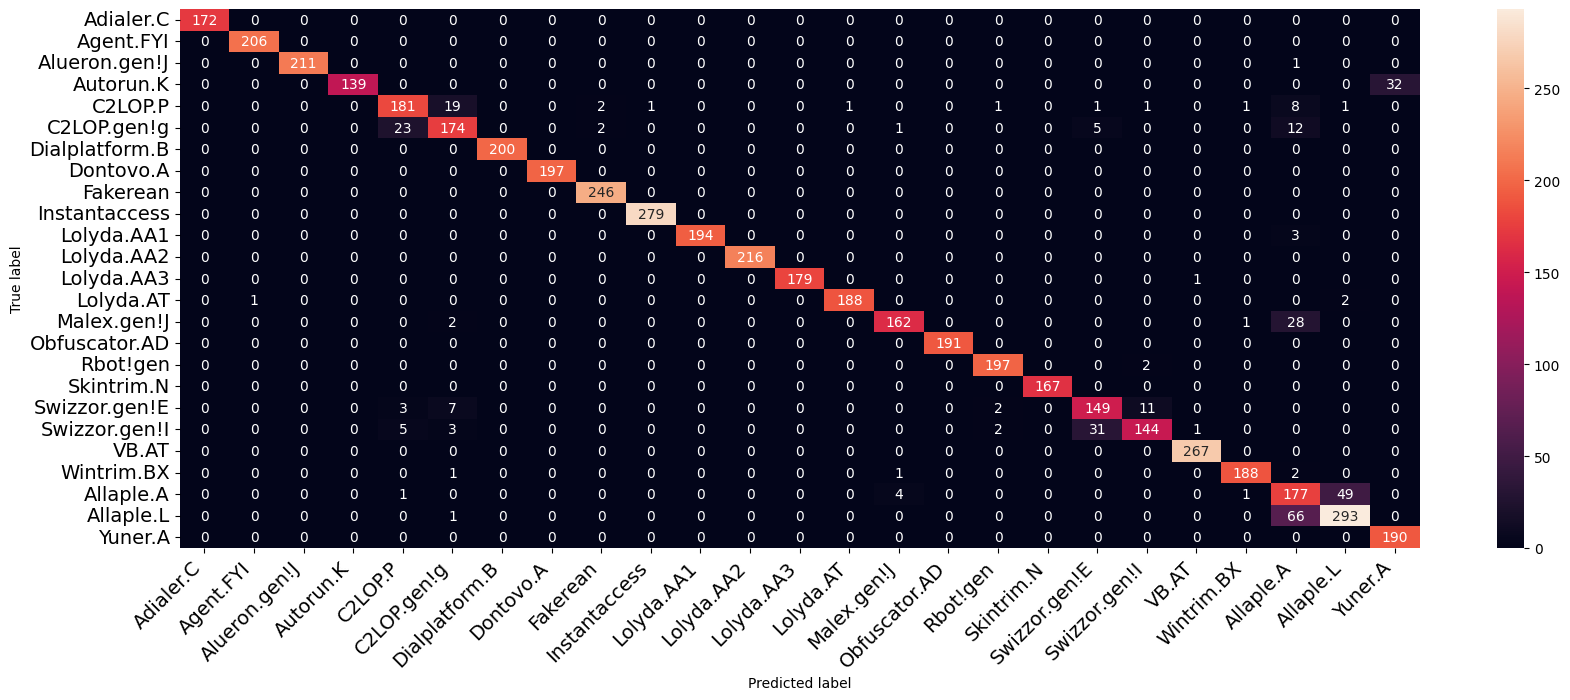

In [ ]:
#class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, classes, figsize = (20,7), fontsize=14)

# **Test**

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

import pickle
import numpy as np
from PIL import Image
import cv2
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras


import sys
import os
from math import log
import scipy as sp
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

class_indices = (
    ('Adialer.C', 0),
    ('Agent.FYI', 1),
    ('Alueron.gen!J', 2),
    ('Autorun.K', 3),
    ('C2LOP.P', 4),
    ('C2LOP.gen!g', 5),
    ('Dialplatform.B', 6),
    ('Dontovo.A', 7),
    ('Fakerean', 8),
    ('Instantaccess', 9),
    ('Lolyda.AA1', 10),
    ('Lolyda.AA2', 11),
    ('Lolyda.AA3', 12),
    ('Lolyda.AT', 13),
    ('Malex.gen!J', 14),
    ('Obfuscator.AD', 15),
    ('Rbot!gen', 16),
    ('Skintrim.N', 17),
    ('Swizzor.gen!E', 18),
    ('Swizzor.gen!I', 19),
    ('VB.AT', 20),
    ('Wintrim.BX', 21),
    ('Allaple.A', 22),
    ('Allaple.L', 23),
    ('Yuner.A', 24)
)

# Chuyển đổi tuple thành dictionary
class_indices = dict(class_indices)

# Lấy các keys của dictionary
classes = class_indices.keys()

# In ra kết quả
print(classes)

#ok
with open('/content/drive/MyDrive/Dữ liệu/data_thưc tập/modified_combined_data.pkl', 'rb') as f:
    imgs, labels = pickle.load(f)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

import keras
from keras.models import Sequential, Model
from keras.layers import Input

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

num_classes = 25

# relu
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(32,32,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

Malware_model = malware_model()

import numpy as np

y_train_new = np.argmax(y_train, axis=1)

np.unique(y_train_new)

from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes =  np.unique(y_train_new),
                                     y = y_train_new)

class_weights = dict(zip(np.unique(y_train_new), class_weights))
class_weights

# relu
history = Malware_model.fit(X_train, y_train, batch_size=30, validation_data=(X_test, y_test), epochs=40,  class_weight=class_weights)

import matplotlib.pyplot as plt

# Lấy lịch sử của độ accuracy và độ loss trên tập huấn luyện và tập kiểm tra
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Vẽ đồ thị
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 6))

# Độ accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Độ loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Lưu mô hình vào một tệp tin
Malware_model.save("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

# **Interface**

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model

In [ ]:
# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Tạo từ điển để ánh xạ nhãn số sang tên loại mã độc
class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}


In [ ]:
# Hàm để chọn ảnh từ thư mục
def open_folder():
    global img_path
    img_path = filedialog.askopenfilename()
    img = Image.open(img_path)
    img = img.resize((128, 128))  # Resize hình ảnh nếu cần
    img = ImageTk.PhotoImage(img)
    panel = tk.Label(window, image=img)
    panel.image = img
    panel.pack()

In [ ]:
# Hàm để dự đoán loại mã độc từ ảnh
def identify():
    img = Image.open(img_path)
    img = img.resize((32, 32))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_name = class_indices[class_idx]

    result_label.config(text=f"Loại mã độc: {class_name}")

In [ ]:

!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
# Start Xvfb and set the DISPLAY environment variable
!Xvfb :1 -screen 0 1024x768x24 &
os.environ['DISPLAY'] = ':1'

In [ ]:
pip install tkinter pillow keras numpy

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [ ]:
# Tạo giao diện GUI
window = tk.Tk()
window.title("Malware Identification")
window.geometry("400x400")

open_button = tk.Button(window, text="Open Folder", command=open_folder)
open_button.pack()

identify_button = tk.Button(window, text="Identify", command=identify)
identify_button.pack()

result_label = tk.Label(window, text="")
result_label.pack()

window.mainloop()

TclError: couldn't connect to display ":1"


# Dưới đây là một cách khác để tạo giao diện đơn giản sử dụng ipywidgets:




In [ ]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
from keras.models import load_model

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

# Tạo từ điển để ánh xạ nhãn số sang tên loại mã độc
class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}

# Hàm để chọn ảnh từ thư mục
def open_folder(change):
    global img_path
    img_path = list(change['new'].keys())[0]
    img = Image.open(img_path)
    img = img.resize((128, 128))  # Resize hình ảnh nếu cần
    img_display = widgets.Image(value=img.tobytes())
    display(img_display)

# Hàm để dự đoán loại mã độc từ ảnh
def identify(change):
    img = Image.open(img_path)
    img = img.resize((32, 32))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_name = class_indices[class_idx]

    result_label.value = f"Loại mã độc: {class_name}"

# Tạo widget để chọn file
file_selector = widgets.FileUpload(accept='image/*', multiple=False)
file_selector.observe(open_folder, names='value')
display(file_selector)

# Tạo nút để dự đoán
identify_button = widgets.Button(description="Identify")
identify_button.on_click(identify)
display(identify_button)

# Hiển thị kết quả
result_label = widgets.Label(value="")
display(result_label)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Identify', style=ButtonStyle())

Label(value='')

FileNotFoundError: [Errno 2] No such file or directory: '002899612714496b129149989e058ac4.png'

FileNotFoundError: [Errno 2] No such file or directory: '002899612714496b129149989e058ac4.png'

In [ ]:
!pip install gradio

import gradio as gr
from keras.models import load_model
from PIL import Image
import numpy as np

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}

def classify_malware(img):
    img = img.resize((32, 32))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_name = class_indices[class_idx]

    return class_name

gr.Interface(fn=classify_malware, inputs="image", outputs="text").launch()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://387a92d553da3ffc3d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
from keras.models import load_model
from PIL import Image
import numpy as np

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}

def classify_malware(img):
    try:
        img = img.resize((32, 32))  # Resize ảnh về kích thước 32x32
        img = np.array(img) / 255.0  # Chuẩn hóa ảnh
        img = np.expand_dims(img, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình

        prediction = model.predict(img)  # Dự đoán với mô hình
        class_idx = np.argmax(prediction, axis=1)[0]  # Lấy chỉ số của nhãn dự đoán
        class_name = class_indices[class_idx]  # Lấy tên mã độc dựa trên chỉ số

        return class_name  # Trả về tên mã độc

    except Exception as e:
        return f"Error: {str(e)}"  # Trả về lỗi nếu có

# Tạo giao diện với Gradio
interface = gr.Interface(fn=classify_malware, inputs="image", outputs="text", title="Malware Identifier")

# Khởi chạy giao diện
interface.launch()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://801c7b214b5a898b75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from keras.models import load_model
from PIL import Image
import numpy as np

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}

def classify_malware(img):
    try:
        img = img.convert("RGB")  # Đảm bảo ảnh là RGB
        img = img.resize((32, 32))  # Resize ảnh về kích thước 32x32
        img = np.array(img) / 255.0  # Chuẩn hóa ảnh
        img = np.expand_dims(img, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình

        prediction = model.predict(img)  # Dự đoán với mô hình
        class_idx = np.argmax(prediction, axis=1)[0]  # Lấy chỉ số của nhãn dự đoán
        class_name = class_indices[class_idx]  # Lấy tên mã độc dựa trên chỉ số

        return class_name  # Trả về tên mã độc

    except Exception as e:
        return f"Error: {str(e)}"  # Trả về lỗi nếu có

# Tạo giao diện với Gradio
interface = gr.Interface(fn=classify_malware, inputs="image", outputs="text", title="Malware Identifier")

# Khởi chạy giao diện
interface.launch()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://57623f3293a45403fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Gradio Interface**

In [ ]:
!pip install gradio

In [ ]:
 import gradio as gr
from keras.models import load_model
from PIL import Image
import numpy as np

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode).h5")

class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}
# /content/drive/MyDrive/Dữ liệu/data_thưc tập/malimg_paper_dataset_imgs/Dontovo.A/003c31e91d74c32b5a39bb3095d66d52.png
def classify_malware(img):
    try:
        # Kiểm tra nếu img là numpy.ndarray thì chuyển đổi nó sang PIL.Image
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)

        img = img.convert("RGB")  # Đảm bảo ảnh là RGB
        img = img.resize((32, 32))  # Resize ảnh về kích thước 32x32
        img = np.array(img) / 255.0  # Chuẩn hóa ảnh
        img = np.expand_dims(img, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình

        prediction = model.predict(img)  # Dự đoán với mô hình
        class_idx = np.argmax(prediction, axis=1)[0]  # Lấy chỉ số của nhãn dự đoán
        class_name = class_indices[class_idx]  # Lấy tên mã độc dựa trên chỉ số

        return class_name  # Trả về tên mã độc

    except Exception as e:
        return f"Error: {str(e)}"  # Trả về lỗi nếu có

# Tạo giao diện với Gradio
interface = gr.Interface(fn=classify_malware, inputs="image", outputs="text", title="Malware Identifier", flagging_dir="/content/drive/MyDrive/Dữ liệu/data_thưc tập/flagged_data")

# Khởi chạy giao diện
interface.launch()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fedf8fdf95910e0830.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!ls


drive  sample_data


In [ ]:
!find / -name "flagged_data.csv"


find: ‘/proc/60/task/60/net’: Invalid argument
find: ‘/proc/60/net’: Invalid argument
find: ‘/proc/797/task/797/net’: Invalid argument
find: ‘/proc/797/net’: Invalid argument
find: ‘/proc/2718/task/2718/net’: Invalid argument
find: ‘/proc/2718/net’: Invalid argument
^C


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          69,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,880 (319.85 KB)

 Trainable params: 81,878 (319.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import gradio as gr
from keras.models import load_model
from PIL import Image
import numpy as np

# Load mô hình đã được huấn luyện
model = load_model("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malware_model(mycode_1).h5")

class_indices = {
    0: 'Adialer.C',
    1: 'Agent.FYI',
    2: 'Alueron.gen!J',
    3: 'Autorun.K',
    4: 'C2LOP.P',
    5: 'C2LOP.gen!g',
    6: 'Dialplatform.B',
    7: 'Dontovo.A',
    8: 'Fakerean',
    9: 'Instantaccess',
    10: 'Lolyda.AA1',
    11: 'Lolyda.AA2',
    12: 'Lolyda.AA3',
    13: 'Lolyda.AT',
    14: 'Malex.gen!J',
    15: 'Obfuscator.AD',
    16: 'Rbot!gen',
    17: 'Skintrim.N',
    18: 'Swizzor.gen!E',
    19: 'Swizzor.gen!I',
    20: 'VB.AT',
    21: 'Wintrim.BX',
    22: 'Allaple.A',
    23: 'Allaple.L',
    24: 'Yuner.A'
}

# Kiểm tra nếu img là numpy.ndarray thì chuyển đổi nó sang PIL.Image
#if isinstance(img, np.ndarray):
#   img = Image.fromarray(img)

from PIL import Image
import numpy as np
import cv2
# Đọc ảnh từ đường dẫn
img = cv2.imread("/content/drive/MyDrive/Dữ liệu/data_thưc tập/malimg_paper_dataset_imgs/Lolyda.AA1/000151955f18550a59fcc81a94170aa5.png")




In [ ]:
img.shape


(400, 64, 3)

array([[[ 77,  77,  77],
        [ 90,  90,  90],
        [144, 144, 144],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [ 31,  31,  31],
        [186, 186, 186],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 80,  80,  80],
        [115, 115, 115],
        [221, 221, 221],
        ...,
        [ 18,  18,  18],
        [179, 179, 179],
        [107, 107, 107]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
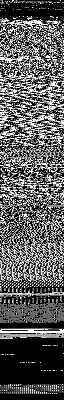

In [ ]:
img

In [ ]:
#img = img.convert("RGB")  # Đảm bảo ảnh là RGB


In [ ]:
img = cv2.resize(img, (32, 32))  # Resize ảnh về kích thước 32x32


In [ ]:
img = np.array(img) / 255.0  # Chuẩn hóa ảnh


In [ ]:
img.shape

(32, 32, 3)

In [ ]:
img

array([[[0.21176471, 0.21176471, 0.21176471],
        [0.00784314, 0.00784314, 0.00784314],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.07058824, 0.07058824],
        [0.        , 0.        , 0.        ]],

       [[0.18431373, 0.18431373, 0.18431373],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.48235294, 0.48235294, 0.48235294],
        ...,
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        [0.0745098 , 0.0745098 , 0.0745098 ]],

       [[0.84705882, 0.84705882, 0.84705882],
        [0.29803922, 0.29803922, 0.29803922],
        [0.12156863, 0.12156863, 0.12156863],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.49019608, 0.49019608, 0.49019608],
        [0.5372549 , 0.5372549 , 0.5372549 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
img = np.expand_dims(img, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình


In [ ]:
img.shape

(1, 32, 32, 3)

In [ ]:
img

array([[[[0.21176471, 0.21176471, 0.21176471],
         [0.00784314, 0.00784314, 0.00784314],
         [0.19215686, 0.19215686, 0.19215686],
         ...,
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.07058824, 0.07058824],
         [0.        , 0.        , 0.        ]],

        [[0.18431373, 0.18431373, 0.18431373],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.48235294, 0.48235294, 0.48235294],
         ...,
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        [[0.84705882, 0.84705882, 0.84705882],
         [0.29803922, 0.29803922, 0.29803922],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.42745098, 0.42745098, 0.42745098],
         [0.49019608, 0.49019608, 0.49019608],
         [0.5372549 , 0.5372549 , 0.5372549 ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
# Dự đoán với mô hình
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
prediction

array([[6.0654633e-17, 6.2194857e-20, 9.9999964e-01, 1.4844474e-14,
        1.6704575e-11, 3.5101734e-13, 1.3116407e-21, 2.8717421e-17,
        7.1697842e-10, 1.9487842e-07, 5.6522360e-08, 8.5535579e-10,
        1.1817043e-07, 3.6910965e-14, 1.9819387e-12, 3.3884455e-14,
        3.8947747e-19, 1.0971975e-12, 6.1935198e-18, 2.5783011e-17,
        9.6839539e-13, 2.2824453e-13, 2.4003907e-10, 5.5668668e-12,
        1.1830048e-12]], dtype=float32)

In [ ]:
class_idx = np.argmax(prediction, axis = 1)[0]
class_idx

2

In [ ]:
#img = img.convert("RGB")  # Đảm bảo ảnh là RGB
#img = img.resize((32, 32))  # Resize ảnh về kích thước 32x32
#img = np.array(img) / 255.0  # Chuẩn hóa ảnh
#img = np.expand_dims(img, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình

# Dự đoán với mô hình
#prediction = model.predict(img)

# Lấy chỉ số của nhãn dự đoán
#class_idx = np.argmax(prediction, axis=1)[0]

# Lấy tên mã độc dựa trên chỉ số
class_name = class_indices[class_idx]
class_name
# Trả về tên mã độc
#result = class_name

'Dontovo.A'

# **KNN model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/Dữ liệu/dataset/dataset.csv")

# Kiểm tra các cột của dataset
features = list(dataset)
print("Các cột của dataset:", features)

# Chọn số cột (dựa trên file csv của bạn)
ncolunm = len(dataset.values[0])
print('ncolunm: ', ncolunm)

# Chia dữ liệu thành biến đầu vào (X) và biến đầu ra (y)
X = dataset.values[:, :ncolunm-1]  # Các cột đặc trưng (feature columns)
y = dataset.values[:, ncolunm-1:]  # Nhãn (label column)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
# Chuẩn hóa dữ liệu (Standardization) để KNN hoạt động hiệu quả hơn
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

# Khởi tạo mô hình KNN với k = 5 (hoặc bạn có thể điều chỉnh giá trị k)
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác (Accuracy):", metrics.accuracy_score(y_test, y_pred))
print("Báo cáo phân loại (Classification Report):\n", metrics.classification_report(y_test, y_pred))


Các cột của dataset: ['AVIMakeCompressedStream', 'AbortDoc', 'AbortPath', 'AccessibleObjectFromWindow', 'ActivateActCtx', 'ActivateKeyboardLayout', 'AddAccessAllowedAce', 'AddAce', 'AddAtom', 'AddFontMemResourceEx', 'AddFontResource', 'AddFontResourceEx', 'AddRefActCtx', 'AddVectoredExceptionHandler', 'AdjustTokenGroups', 'AdjustTokenPrivileges', 'AdjustWindowRectEx', 'AllocConsole', 'AllocateAndInitializeSid', 'AllocateLocallyUniqueId', 'AllowSetForegroundWindow', 'AlphaBlend', 'AngleArc', 'AnimatePalette', 'AnyPopup', 'AppendMenu', 'Arc', 'AreFileApisANSI', 'AttachConsole', 'AttachThreadInput', 'AuthzFreeResourceManager', 'AuthzInitializeContextFromSid', 'BRUSHOBJ_pvAllocRbrush', 'BackupRead', 'Beep', 'BeginDeferWindowPos', 'BeginPaint', 'BeginPath', 'BeginUpdateResource', 'BindIoCompletionCallback', 'BitBlt', 'BlockInput', 'BringWindowToTop', 'BroadcastSystemMessage', 'CLIPOBJ_ppoGetPath', 'CLSIDFromProgID', 'CLSIDFromString', 'CallNamedPipe', 'CallNextHookEx', 'CallWindowProc', 'Ca

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

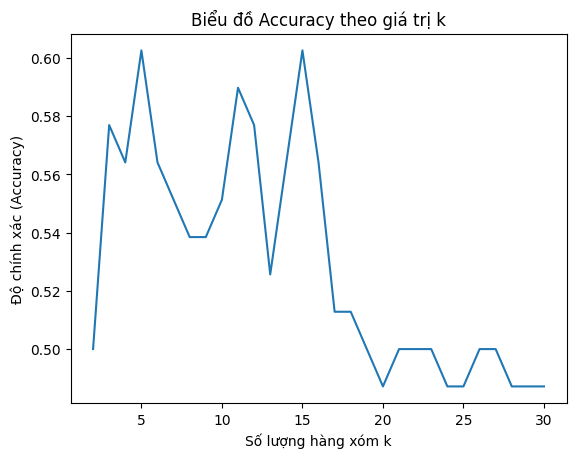

In [ ]:
import matplotlib.pyplot as plt

# Thử nghiệm với nhiều giá trị của k để tìm k tối ưu
k_range = range(2, 31)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))

# Vẽ biểu đồ Accuracy theo k
plt.plot(k_range, accuracy_scores)
plt.xlabel('Số lượng hàng xóm k')
plt.ylabel('Độ chính xác (Accuracy)')
plt.title('Biểu đồ Accuracy theo giá trị k')
plt.show()
